<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/deep-learning-projects-/blob/main/model_building_from_scratch_and_custom_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
try :
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


#Creating Model class from scratch

In [20]:
class Model():
  def __init__(self):
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)
  def __call__(self,x):
    return self.w * x + self.b


In [21]:
model = Model()

In [22]:
def loss(y_pred , y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

#Training data

In [23]:
TRUE_W = 3.0
TRUE_B = 2.0
NUM_OF_EXAMPLES = 1000

xs = tf.random.normal(shape = [NUM_OF_EXAMPLES])

ys = TRUE_W * xs + TRUE_B

# Definning Plotter

In [24]:
def plot_data(inputs,outputs,predicted_outputs):
  real = plt.scatter(inputs,outputs,c = 'b',marker = '.')
  predicted = plt.scatter(inputs , predicted_outputs,c= 'r',marker = '+')
  
  plt.legend((real,predicted),("Real Data" , "Predicted Data"))
  plt.show()

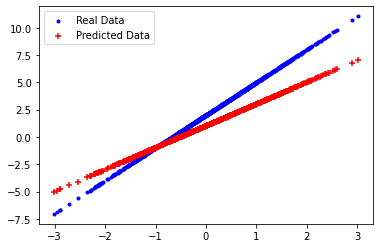

Current loss :2.014741


In [25]:
plot_data(xs,ys,model(xs))
print('Current loss :%1.6f'%loss(model(xs),ys))

#define a training loop

In [28]:
def train(model , inputs , real_outputs,learning_rat):
  with tf.GradientTape() as tap:
    current_loss = loss(model(inputs) ,real_outputs)
    gradient_w , gradient_b = tap.gradient(current_loss, [model.w, model.b])
      
  model.w.assign_sub(learning_rat * gradient_w)
  model.b.assign_sub(learning_rat * gradient_b)
 
  return current_loss

#model training

In [42]:
model = Model()
epochs =  range(15)
losses = []
w_list , b_list = [] , []

for i in (epochs):
  current_losses = train(model,xs,ys,0.01)
  losses.append(current_losses)
  w_list.append(model.w.numpy())
  b_list.append(model.b.numpy())
  print("epochs %1.2f MSE = %1.2f w = %1.2f b = %1.2f"%(i , losses[-1],w_list[-1],b_list[-1]))

epochs 0.00 MSE = 2.01 w = 2.02 b = 1.02
epochs 1.00 MSE = 1.93 w = 2.04 b = 1.04
epochs 2.00 MSE = 1.86 w = 2.06 b = 1.06
epochs 3.00 MSE = 1.78 w = 2.08 b = 1.08
epochs 4.00 MSE = 1.71 w = 2.09 b = 1.10
epochs 5.00 MSE = 1.64 w = 2.11 b = 1.12
epochs 6.00 MSE = 1.58 w = 2.13 b = 1.14
epochs 7.00 MSE = 1.51 w = 2.15 b = 1.15
epochs 8.00 MSE = 1.45 w = 2.16 b = 1.17
epochs 9.00 MSE = 1.40 w = 2.18 b = 1.19
epochs 10.00 MSE = 1.34 w = 2.20 b = 1.21
epochs 11.00 MSE = 1.29 w = 2.21 b = 1.22
epochs 12.00 MSE = 1.24 w = 2.23 b = 1.24
epochs 13.00 MSE = 1.19 w = 2.24 b = 1.25
epochs 14.00 MSE = 1.14 w = 2.26 b = 1.27


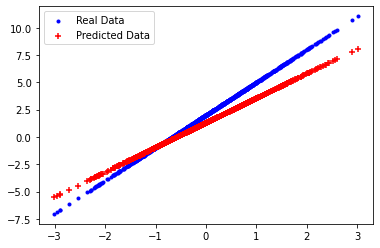

In [43]:
plot_data(xs,ys,model(xs))

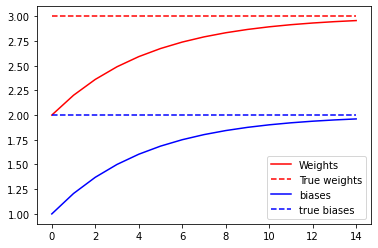

In [57]:
weights = plt.plot(epochs , list_w,'r',epochs , [TRUE_w]*len(epochs),'r--')
bias = plt.plot(epochs , list_b,'b',epochs , [TRUE_B]*len(epochs),'b--')
plt.legend(["Weights","True weights","biases","true biases"])
plt.show()